In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("NetflixOriginals.csv", encoding="ISO-8859-1")
dataframe.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [72]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [73]:
dataframe.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

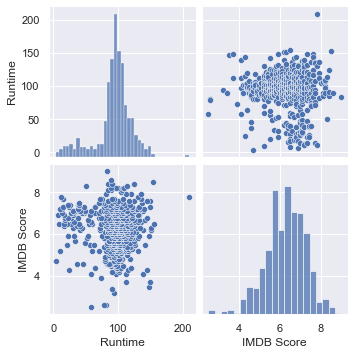

In [292]:
sns.pairplot(dataframe)

(Dataset Linki: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores )

Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

IMDB puanı en yüksek olan ilk 10 film hangileridir?

IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

Hangi yılın toplam "runtime" süresi en fazladır?

Her bir dilin en fazla kullanıldığı "Genre" nedir?

Veri setinde outlier veri var mıdır? Açıklayınız.


# Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [207]:
dataframeUzunSoluklu = dataframe[['Runtime', 'Language']]
dataframeUzunSoluklu.head()

,Runtime,Language
0,58,English/Japanese
1,81,Spanish
2,79,Italian
3,94,English
4,90,Hindi


Text(0, 0.5, 'Language')

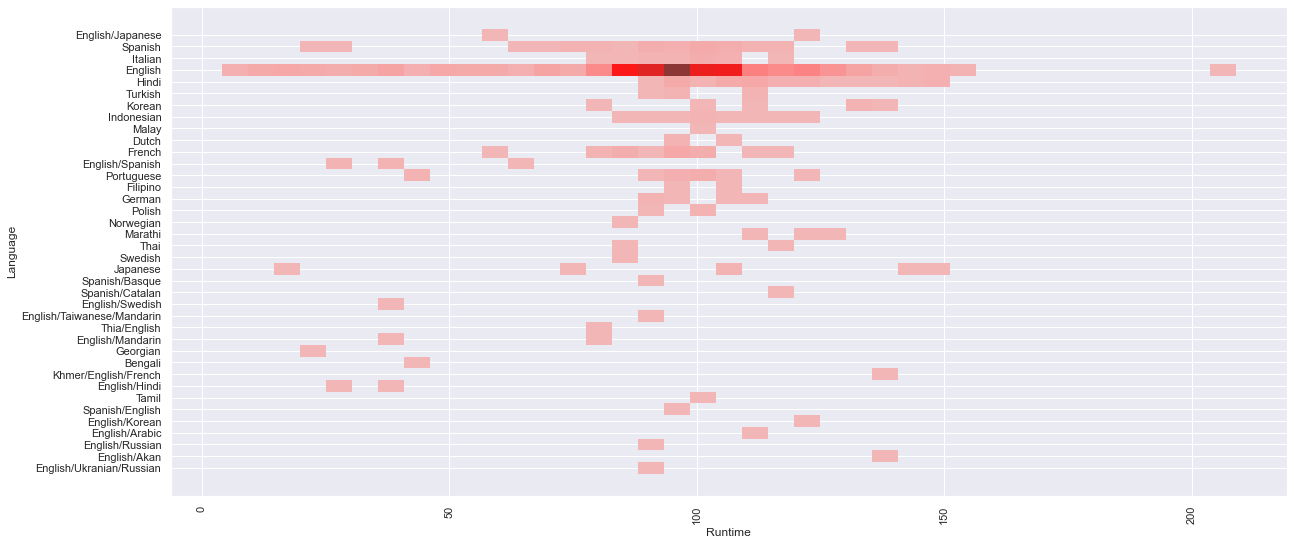

In [208]:
plt.figure(figsize = (20,9))
sns.histplot(x = 'Runtime', y = 'Language', data = dataframeUzunSoluklu, color = 'red')
plt.xticks(rotation=90)
plt.xlabel('Runtime')
plt.ylabel('Language')

# 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [47]:
dataframe['Premiere']

0         August 5, 2019
1        August 21, 2020
2      December 26, 2019
3       January 19, 2018
4       October 30, 2020
             ...        
579    December 31, 2018
580      October 9, 2015
581    December 16, 2018
582     December 8, 2020
583      October 4, 2020
Name: Premiere, Length: 584, dtype: object

In [442]:
dataframe['Premiere'] = pd.to_datetime(dataframe['Premiere'])
dataframeTarih = dataframe[(dataframe['Premiere'] > '2019-01-01') & (dataframe['Premiere'] <= '2020-06-30')]
dataframeTarih = dataframeTarih[(dataframeTarih['Genre'] == "Documentary")]
dataframeTarih.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English


<AxesSubplot:xlabel='IMDB Score', ylabel='Title'>

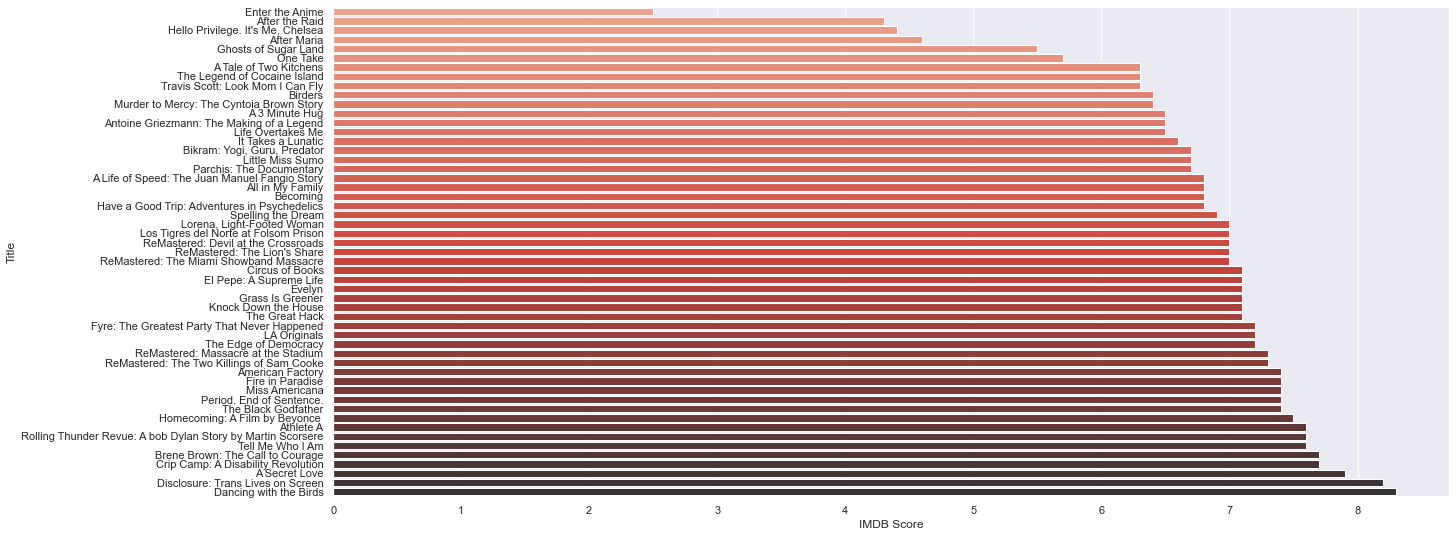

In [443]:
plt.figure(figsize = (20,9))
sns.barplot(x = 'IMDB Score', y = 'Title', data = dataframeTarih,  palette="Reds_d", color = 'red')

# İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [230]:
dataframeİngilizceDili = dataframe[(dataframe['Language'] == "English")]
dataframeİngilizceDili.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
10,Searching for Sheela,Documentary,"April 22, 2021",58,4.1,English
14,Mercy,Thriller,"November 22, 2016",90,4.2,English


In [231]:
dataframeİngilizceDili = dataframeİngilizceDili.rename(columns = {'IMDB Score':'IMDB_Score'})
dataframeİngilizceDiliYeni = dataframeİngilizceDili.groupby('Genre').IMDB_Score.agg(['count', 'mean'])
dataframeİngilizceDiliYeni = dataframeİngilizceDiliYeni.sort_values(by=['mean'], ascending=False)
dataframeİngilizceDiliYeni

,count,mean
Genre,,
Animation/Christmas/Comedy/Adventure,1,8.200000
Musical / Short,1,7.700000
Concert Film,6,7.633333
Animation / Science Fiction,1,7.500000
Historical drama,1,7.200000
...,...,...
Anime / Short,1,4.700000
Superhero-Comedy,1,4.400000
Political thriller,1,4.300000


# 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [95]:
dataframeHindiDili = dataframe[(dataframe['Language'] == "Hindi")]
dataframeHindiDili.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
5,Drive,Action,2019-11-01,147,3.5,Hindi
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi
16,Ghost Stories,Horror anthology,2020-01-01,144,4.3,Hindi
23,The Girl on the Train,Thriller,2021-02-26,120,4.4,Hindi


In [105]:
print("Hindi Dilinde çekilmiş olan filmlerin ortalama runtime süresi:", str(dataframeHindiDili['Runtime'].mean()))  

Hindi Dilinde çekilmiş olan filmlerin ortalama runtime süresi: 115.78787878787878


# 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [257]:
print("Genre Sütunu kaç kategoriye sahiptir:", len(dataframe['Genre'].value_counts()))

Genre Sütunu kaç kategoriye sahiptir: 115


<AxesSubplot:xlabel='Genre', ylabel='count'>

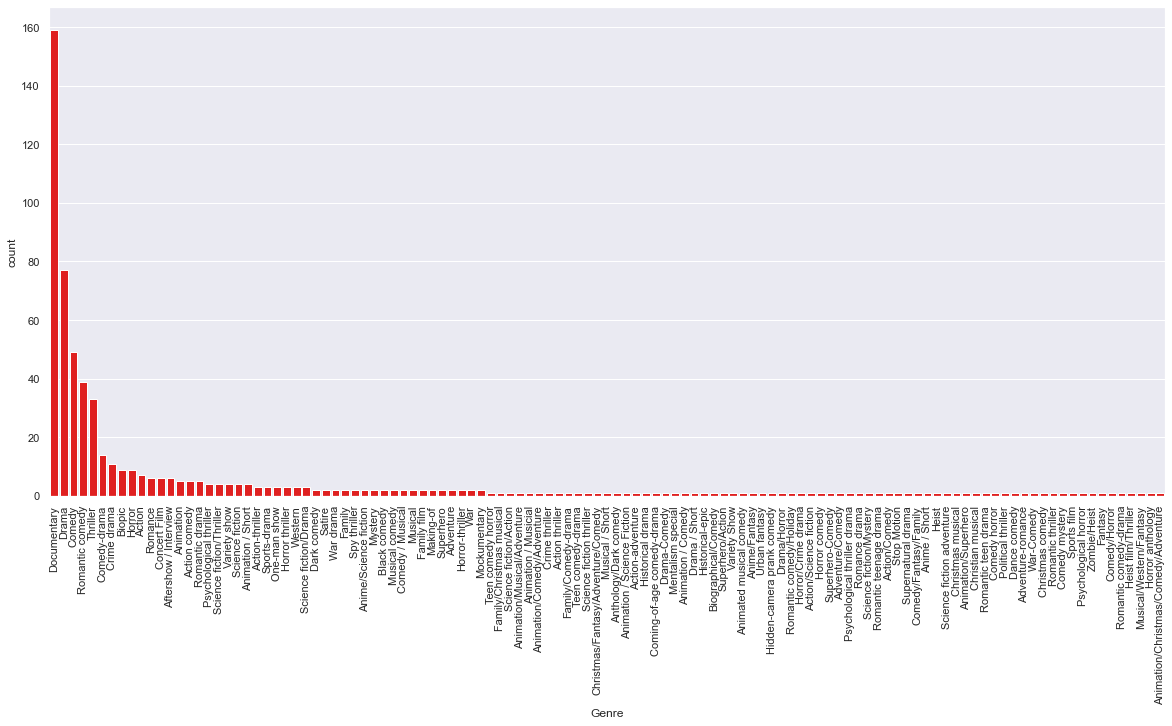

In [440]:
plt.figure(figsize = (20,9))
plt.xticks(rotation=90)
sns.countplot(x ='Genre', data = dataframe, color='red', order = dataframe['Genre'].value_counts().index)

# Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

<AxesSubplot:xlabel='Language', ylabel='count'>

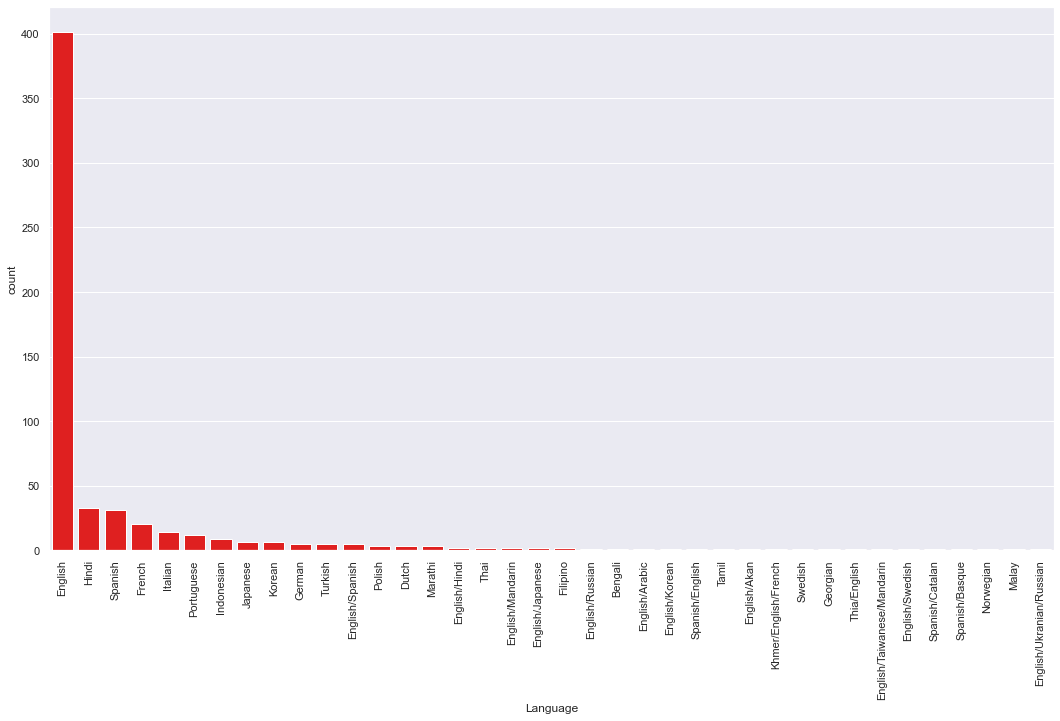

In [487]:
dataframeTop3Dil = dataframe['Language'].value_counts()
plt.xticks(rotation=90)
sns.countplot(x ='Language', data = dataframe, color='red', order = dataframe['Language'].value_counts().index)

In [488]:
dataframeTop3Dil[:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

# IMDB puanı en yüksek olan ilk 10 film hangileridir?

<AxesSubplot:xlabel='IMDB Score', ylabel='Title'>

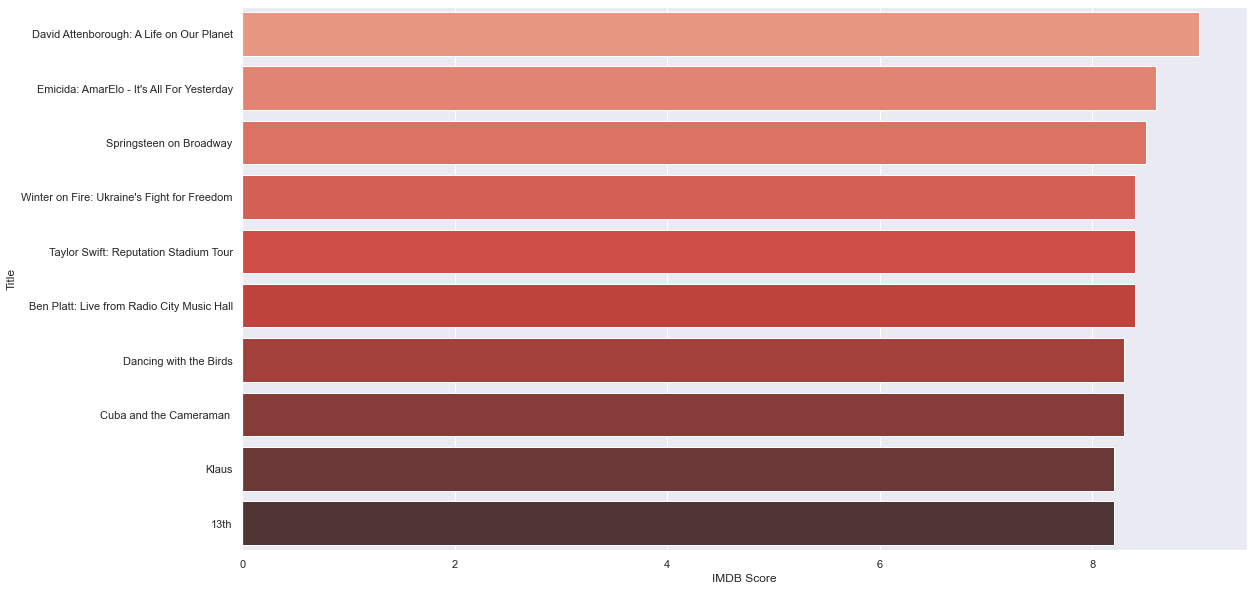

In [491]:
dataframeTop10IMBD = dataframe.sort_values(by=['IMDB Score'], ascending=False)[:10]
sns.barplot(x = 'IMDB Score', y = 'Title', data = dataframeTop10IMBD,  palette="Reds_d", color = 'red')

# IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [17]:
corr = dataframe['Runtime'].corr(dataframe['IMDB Score'])

In [18]:
corr

-0.040896291420788704

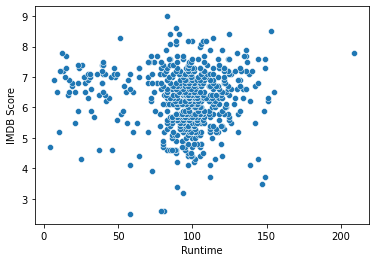

In [19]:
sns.scatterplot(data=dataframe, x="Runtime", y="IMDB Score");

# IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [284]:
dataframeTop10IMBDGenre = dataframe.sort_values(by=['IMDB Score'], ascending=False)[:10]
dataframeTop10IMBDGenre

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English
571,13th,Documentary,"October 7, 2016",100,8.2,English


<AxesSubplot:xlabel='Genre', ylabel='IMDB Score'>

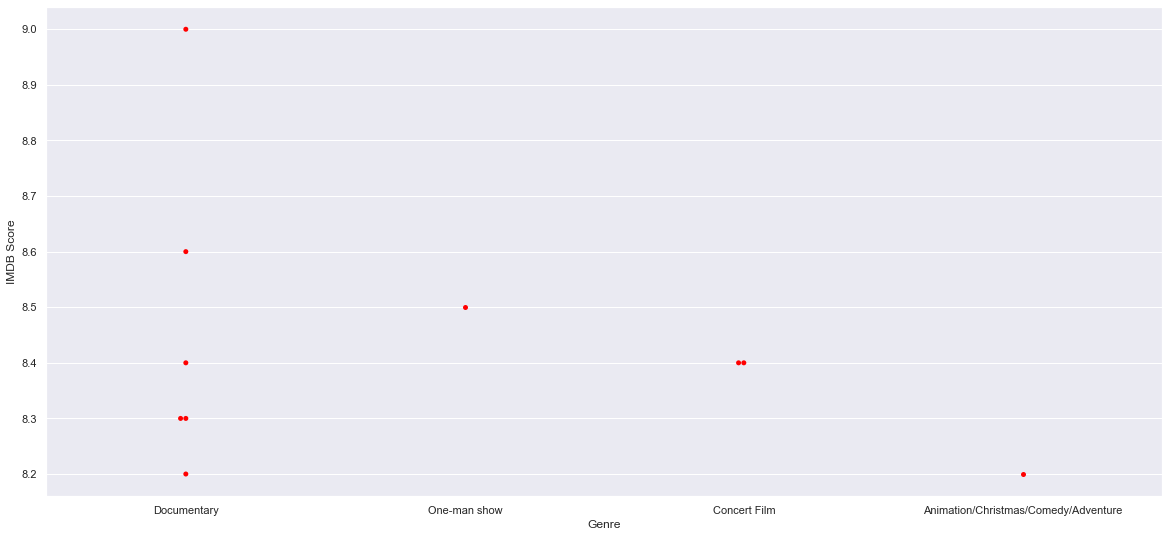

In [327]:
plt.figure(figsize = (20,9))
sns.swarmplot(x = 'Genre', y = 'IMDB Score', data = dataframeTop10IMBDGenre, color = 'red')

# Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [287]:
dataframeTop10Runtime = dataframe.sort_values(by=['Runtime'], ascending=False)[:10]
dataframeTop10Runtime

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English
5,Drive,Action,"November 1, 2019",147,3.5,Hindi


<AxesSubplot:xlabel='Runtime', ylabel='Title'>

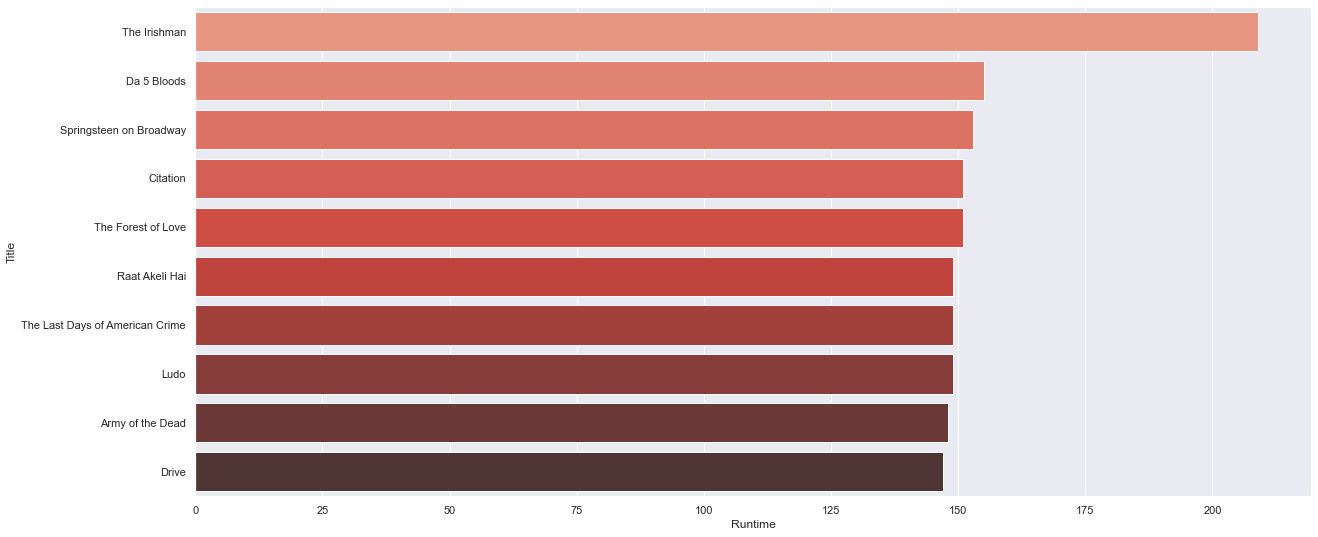

In [438]:
plt.figure(figsize = (20,9))
sns.barplot(x = 'Runtime', y = 'Title', data = dataframeTop10Runtime, palette="Reds_d")

# Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [27]:
dataframeTarih = pd.to_datetime(dataframe['Premiere'])
dataYil = dataframeTarih.dt.year.value_counts()
dataYil

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Premiere, dtype: int64

<AxesSubplot:ylabel='Premiere'>

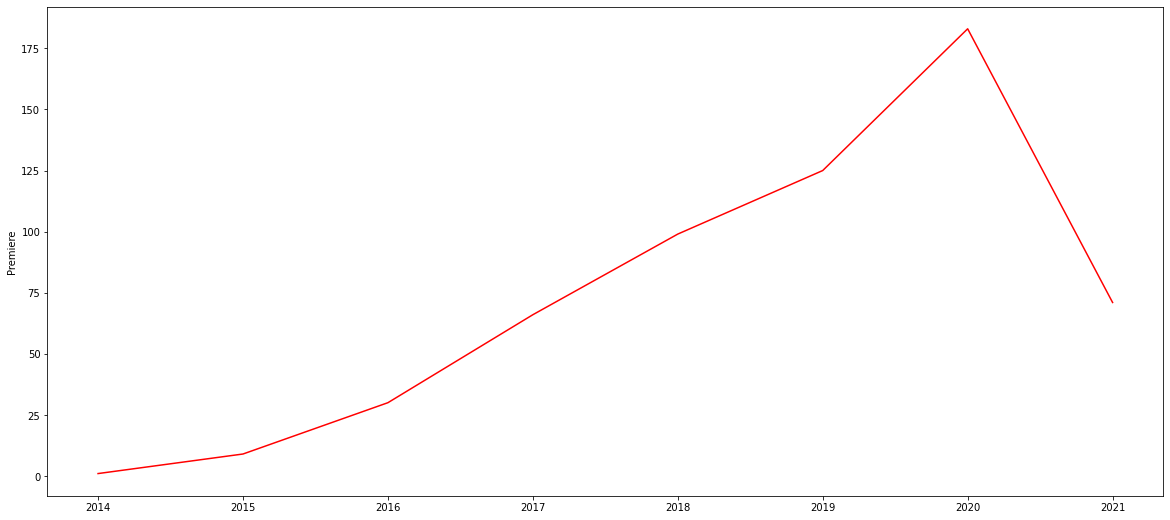

In [38]:
plt.figure(figsize = (20,9))
sns.lineplot(data = dataYil, color = 'red')

# Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [381]:
dataframeEnDusukIMBD = dataframe[['IMDB Score', 'Language']]
dataframeEnDusukIMBD = dataframeEnDusukIMBD.groupby('Language')['IMDB Score'].mean().reset_index().sort_values(by = ['IMDB Score'], ascending=True)
dataframeEnDusukIMBD.head()

,Language,IMDB Score
24,Malay,4.200000
6,English/Japanese,4.400000
26,Norwegian,5.100000
14,Filipino,5.100000
27,Polish,5.166667


<AxesSubplot:xlabel='IMDB Score', ylabel='Language'>

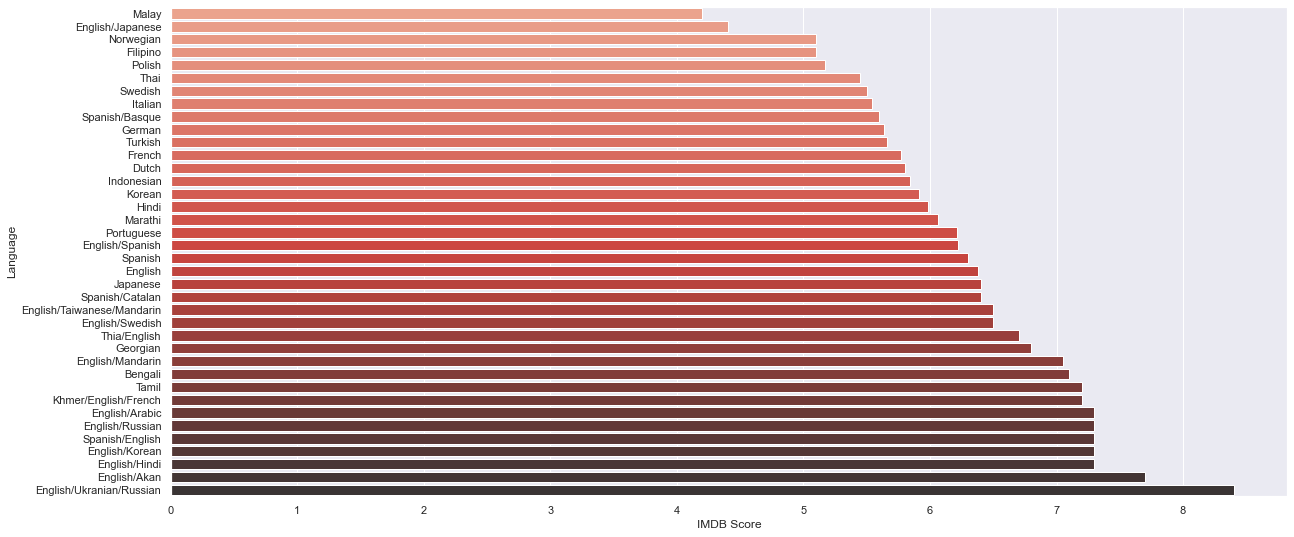

In [428]:
plt.figure(figsize = (20,9))
sns.barplot(x = 'IMDB Score', y = 'Language', data = dataframeEnDusukIMBD, palette="Reds_d")

# Hangi yılın toplam "runtime" süresi en fazladır?

In [472]:
dataframeToplamRuntime = dataframe[['Runtime', 'Premiere']]
dataframeToplamRuntime['Premiere'] = pd.to_datetime(dataframeToplamRuntime['Premiere'])
dataframeToplamRuntime = dataframeToplamRuntime.groupby(dataframeToplamRuntime['Premiere'].dt.year).sum()
dataframeToplamRuntime

,Runtime
Premiere,
2014,81
2015,814
2016,2766
2017,6129
2018,9405
2019,10856
2020,17384
2021,7214


<AxesSubplot:xlabel='Runtime', ylabel='Premiere'>

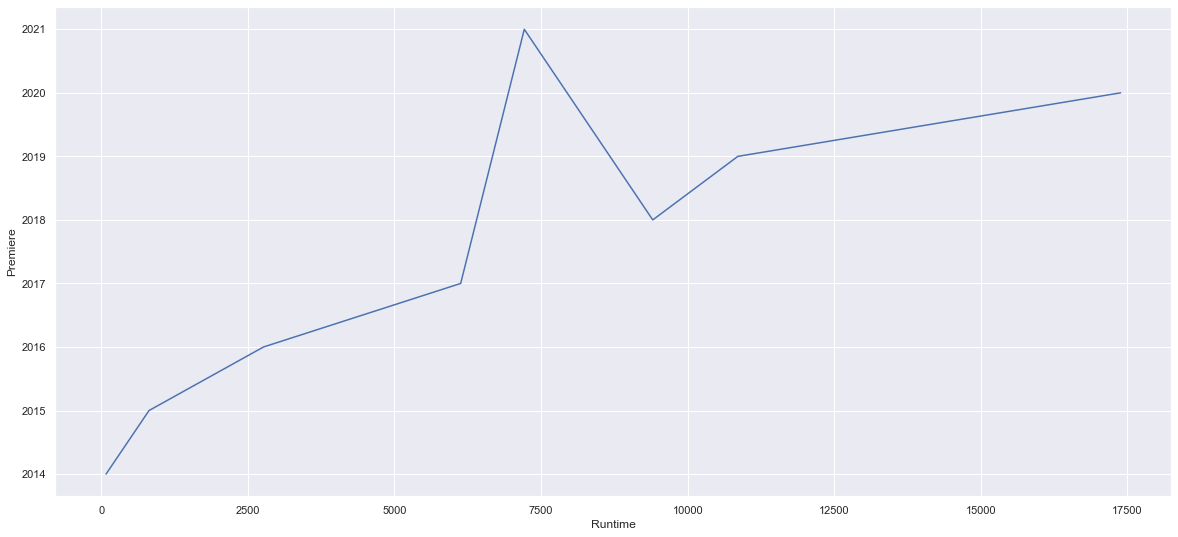

In [484]:
plt.figure(figsize = (20,9))
sns.lineplot(x = 'Runtime', y = 'Premiere', data = dataframeToplamRuntime, palette="Reds_d")

# Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [47]:
dataframeEnFazlaGenre = pd.pivot_table(dataframe, values = 'Title', index = ['Language','Genre'], aggfunc='count').reset_index().sort_values(by='Title', ascending = False)
dataframeEnFazlaGenre

,Language,Genre,Title
44,English,Documentary,120
45,English,Drama,35
32,English,Comedy,30
76,English,Romantic comedy,27
96,English,Thriller,14
...,...,...,...
81,English,Satire,1
83,English,Science fiction adventure,1
84,English,Science fiction/Action,1
86,English,Science fiction/Mystery,1


<AxesSubplot:xlabel='Title', ylabel='Language'>

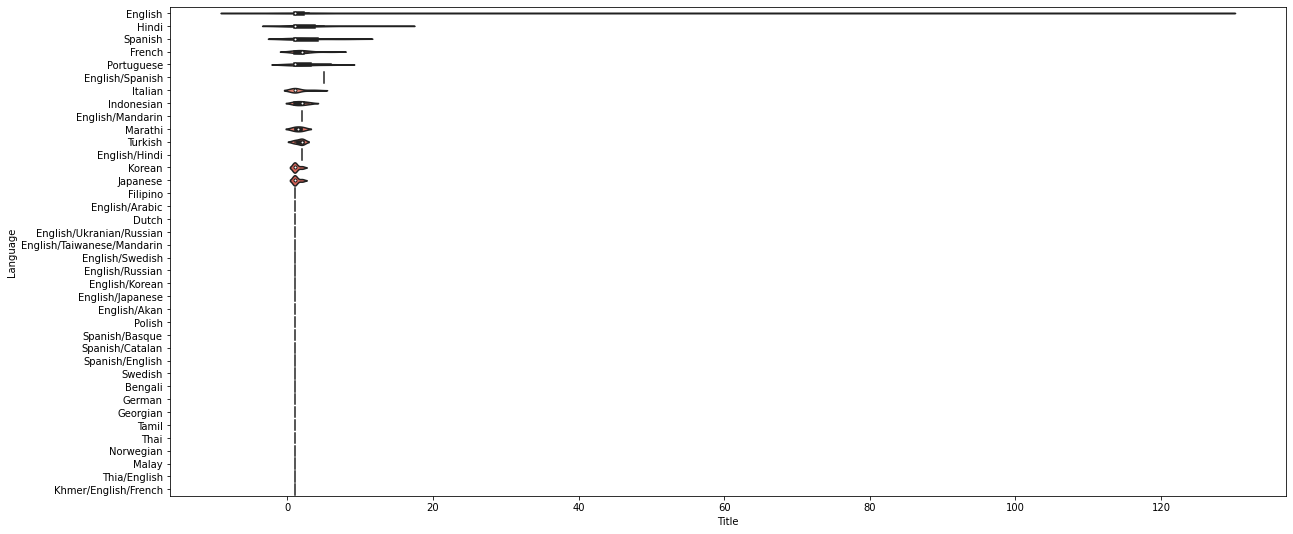

In [71]:
plt.figure(figsize = (20,9))
sns.violinplot(x = 'Title', y = 'Language', data = dataframeEnFazlaGenre.sort_values(by = 'Title', ascending=False), palette="Reds_d")

# Veri setinde outlier veri var mıdır? Açıklayınız.

In [4]:
outlier = dataframe[['Genre','Runtime','IMDB Score']]
outlier

,Genre,Runtime,IMDB Score
0,Documentary,58,2.5
1,Thriller,81,2.6
2,Science fiction/Drama,79,2.6
3,Horror thriller,94,3.2
4,Mystery,90,3.4
...,...,...,...
579,Concert Film,125,8.4
580,Documentary,91,8.4
581,One-man show,153,8.5
582,Documentary,89,8.6


In [10]:
ORuntime1 = outlier['Runtime'].quantile(0.1)
ORuntime2 = outlier['Runtime'].quantile(0.9)

ORuntime2 - ORuntime1

70.69999999999999

In [12]:
OIMBD1 = outlier['IMDB Score'].quantile(0.1)
OIMBD2 = outlier['IMDB Score'].quantile(0.9)

OIMBD2 - OIMBD1

2.37